In [1]:
import neurom as nm
from neurom import viewer
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
sys.path[0] = str(Path(sys.path[0]).parent)
from mouselight_code.src import read_swc, visualize, octree, combine_swc_img
from neurom.io import swc
from neurom import morphmath, stats


In [84]:
path1 = "auto111_cc-96783_branch-0002.swc"
path2 = "test_neuron.swc"
path3 = "2018-08-01_G-002_consensus.swc"

wrap = swc.read(path3)
wrap.data_block[:,4]


gt_test = nm.load_neuron(path2)
frag_test = nm.load_neuron(path1)
conc_test = nm.load_neuron(path3)

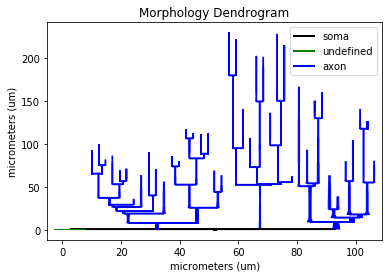

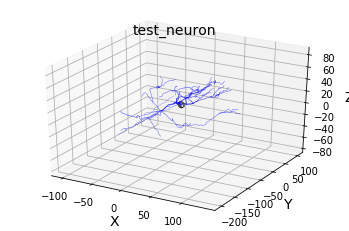

In [18]:
viewer.draw(gt_test, mode = 'dendrogram')
viewer.draw(gt_test, mode = '3d')
plt.show()

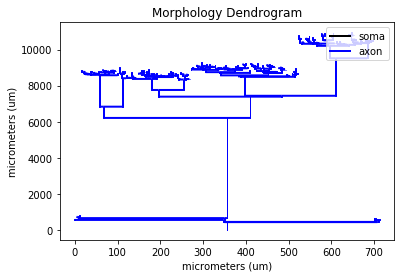

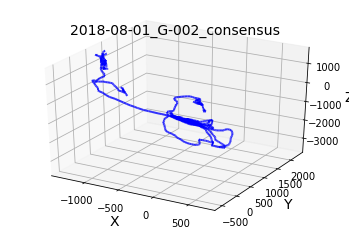

In [85]:

viewer.draw(conc_test, mode = 'dendrogram', output_path = 'NeuroM/figures')
plt.savefig('dendrogram.png')
viewer.draw(conc_test, mode = '3d', output_path = 'NeuroM/figures')
plt.savefig('3d_concensus.png')


In [86]:
# Morph math tests
print(morphmath.average_points_dist(conc_test.points[0], conc_test.points))
print(morphmath.angle_3points(conc_test.points[0],conc_test.points[4],conc_test.points[5]))


2916.9790537651943
0.24502379871349111


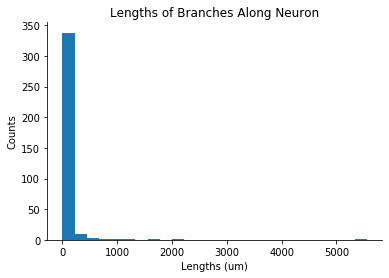

In [87]:
len_list = []
for i in range(len(conc_test.sections)):
    sections = conc_test.sections[i].length
    len_list.append(sections)
    
ax = plt.subplot(111)
ax.hist(len_list, bins = 25)
plt.title("Lengths of Branches Along Neuron")
plt.xlabel("Lengths (um)")
plt.ylabel("Counts")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig("Branch_lens.png")
plt.show()


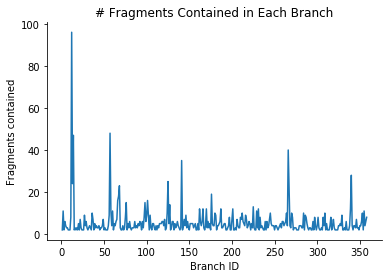

In [104]:
len_list = []
for i in range(len(conc_test.sections)):
    sections = len(conc_test.sections[i].points)
    len_list.append(sections)
#sections = len(conc_test.sections[6].children)
ax = plt.subplot(111)

ax.plot(range(1,len(conc_test.sections)+1),len_list)
plt.xlabel("Branch ID")
plt.ylabel("Fragments contained")
plt.title("# Fragments Contained in Each Branch")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig("frag_counts.png")
plt.show()

AttributeError: 'tuple' object has no attribute 'points'

### SWC tests

In [8]:
im_path = '/cis/net/io50/data/janelia-data/2018-08-01'
swc_path = path3
df, _, _, _ = read_swc.read_swc_offset(swc_path)
tree = octree.octree(im_path)

FileNotFoundError: [Errno 2] No such file or directory: '\\cis\\net\\io50\\data\\janelia-data\\2018-08-01\\transform.txt'

In [ ]:
num_pts = df.shape[0]

for i in range(0,num_pts,5):
    img,start = combine_swc_img.points2img(tree,df.iloc[i:i+5].reset_index())
    print(start)
    points = combine_swc_img.points2voxel(tree,df.iloc[i:i+5].reset_index(),start)
    voxels = points[['xvox','yvox','zvox']].values